Yarden Dahan, 208730523

# Image augmentation  
[More about augmentation](https://blog.roboflow.com/yolov4-data-augmentation/)  
Image augmentation involves altering the training images to **generate a synthetic dataset that is larger than your original dataset** and will hopefully improve the performance of your model.   
Data augmentations include: flipping, rotating, cropping, adding noise, occluding portions of the image, and more.
* CutMix - Combine images by cutting parts from one image and pasting them onto the augmented image.   
* Cutouts - force the model to learn to make predictions based on a robust amount of features. 
<!-- ![title](Img/CutMix.png) -->
<!-- <img src="Img/CutMix.png" alt="Drawing" width= "500"/> -->

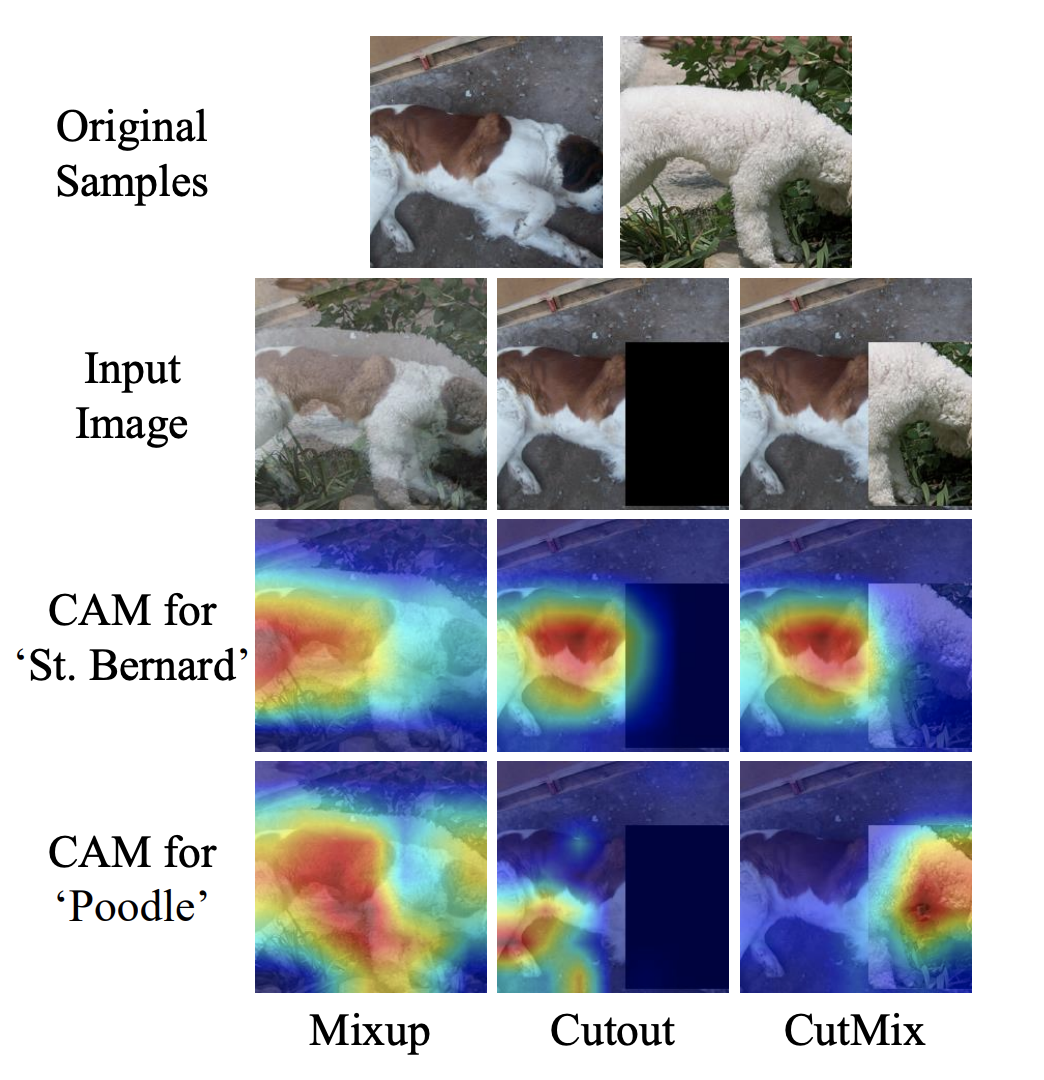

In [ ]:
Image(filename='Img/CutMix.png')

* Mosaic data - combines 4 training images into one in certain ratios (instead of only two in CutMix)  
<!-- ![title](Img/mosaic.png) -->
<!-- <img src="Img/mosaic.png" alt="Drawing" width= "500"/> -->

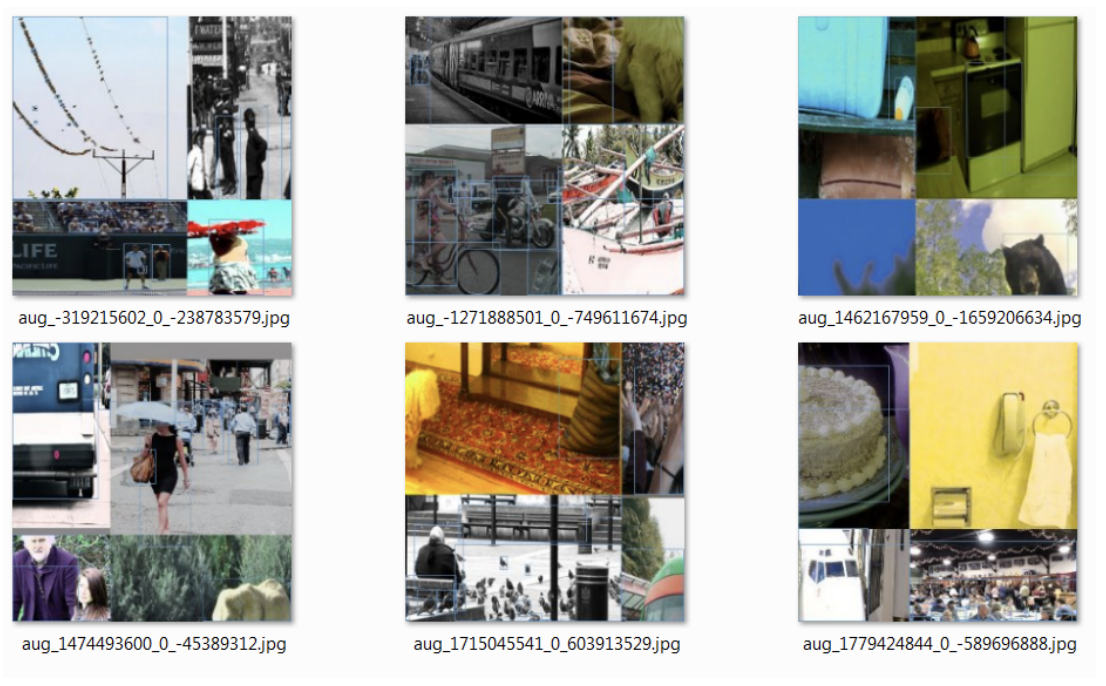

In [ ]:
Image(filename='Img/mosaic.png')

### Imports

In [ ]:
from IPython.display import Image
import numpy as np 
import cv2
import random
import math
from matplotlib import pyplot as plt
from scipy.signal import convolve, convolve2d,correlate2d
from sklearn.metrics import mean_squared_error as mse
import sys
import os
print(sys.executable)
print("""           
        _...----.._
     ,:':::::.     `>.
   ,' |:::::;'     |:::.
  /    `'::'       :::::\\
 /         _____     `::;\\
:         /:::::\\      `  :
| ,.     /::Hi!::\\        |
|;:::.   `::::::;'        |
::::::     `::;'      ,.  ;
 \:::'              ,::::/
  \                 \\:::/
   `.     ,:.        :;'
     `-.::::::..  _.''
        ```----'''

""")
CONDA_PATH = "/home/codebind/Desktop/Computer Vision/"
CONDA_PATH_IMG = os.path.join(CONDA_PATH,'Img/')

/home/codebind/miniconda3/envs/ComputerVision/bin/python
           
        _...----.._
     ,:':::::.     `>.
   ,' |:::::;'     |:::.
  /    `'::'       :::::\
 /         _____     `::;\
:         /:::::\      `  :
| ,.     /::Hi!::\        |
|;:::.   `::::::;'        |
::::::     `::;'      ,.  ;
 \:::'              ,::::/
  \                 \:::/
   `.     ,:.        :;'
     `-.::::::..  _.''
        ```----'''




In [ ]:
def img_show(img, cmap = 'viridis', title = "Image: No title", axis = 'off'):
    # showing image
    plt.axis(axis)
    plt.title(title)
    plt.imshow(img, cmap = cmap)

### Add gaussian noise to an image
$f(x,y) = \hat(f)(x,y) + \eta(x,y)$  
$\eta(x,y)\simeq N(\mu,\sigma)$
> using: `noise = randn(size(image)).*sigma  ,[on MATLAB] `  
> alternative way: `np.random.normal(mean, sigma, (img.shape[0],img.shape[1])) `
> `np.random.randn(size) * sigma + mean`
  
Additive white Gaussian noise (AWGN) is a basic noise model used in information theory to mimic the effect of many random processes that occur in nature. 
[More on Additive Gaussian Noise](https://en.wikipedia.org/wiki/Additive_white_Gaussian_noise)

In [ ]:
def add_guassian_noise(img: np.ndarray, mean: float, sigma: float) -> np.ndarray:
    # 1.create random gaussian distribution floating number
    gaussian = sigma * np.random.randn(int(img.shape[0]),int(img.shape[1]) )+ mean
    # 2. Add the noise to Idle image
    noised_image = img + gaussian
    return noised_image

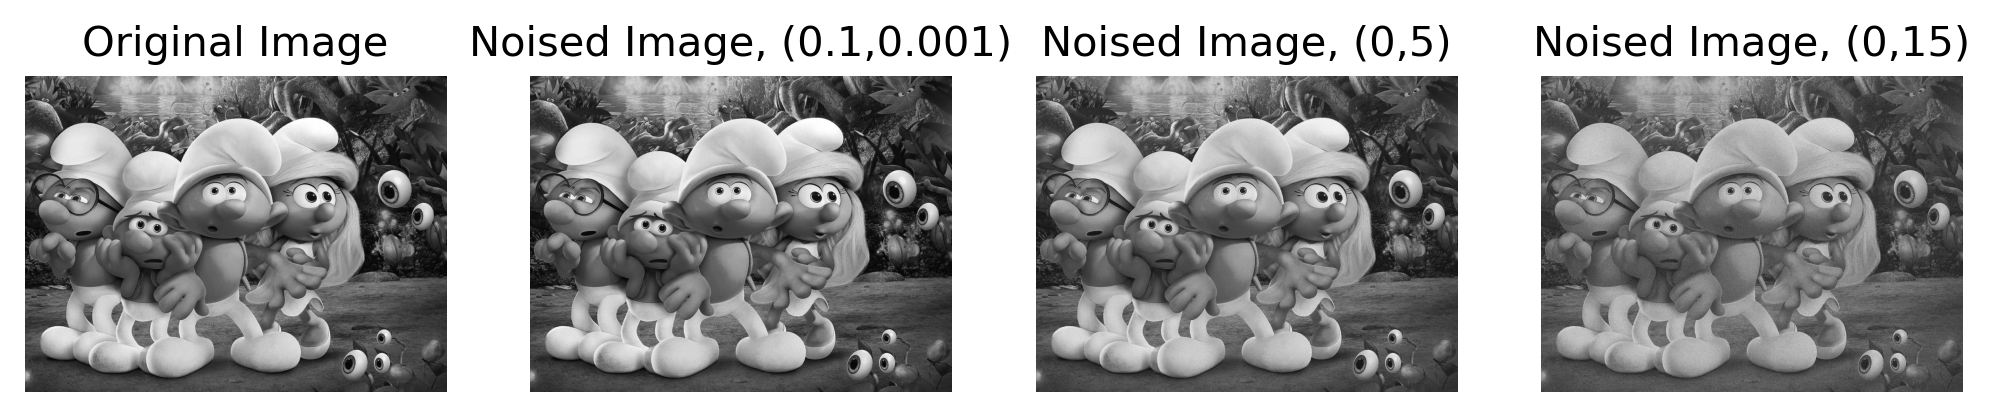

In [ ]:
# create figure
fig = plt.figure(figsize=(10, 7),dpi= 250)
# setting values to rows and column variables
rows = 1
columns = 4
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
#load an image
original_img = cv2.imread(os.path.join(CONDA_PATH_IMG,'smurfs.jpg'))
# original_img = cv2.imread(os.path.join(CONDA_PATH_IMG,'messi_ball.jpg'))
original_img = cv2.cvtColor(original_img,cv2.COLOR_BGR2GRAY)
img_show(original_img,cmap = 'gray',title = "Original Image", axis = 'off')
# Adds a subplot at the 2st position
fig.add_subplot(rows, columns, 2)
noised_img_1 = add_guassian_noise(original_img, 0.1, 0.001)
img_show(noised_img_1,cmap = 'gray',title = "Noised Image, (0.1,0.001)", axis = 'off')
# Adds a subplot at the 3st position
fig.add_subplot(rows, columns, 3)
noised_img_2 = add_guassian_noise(original_img, 0, 5)
img_show(noised_img_2,cmap = 'gray',title = "Noised Image, (0,5)", axis = 'off')
# Adds a subplot at the 4st position
fig.add_subplot(rows, columns, 4)
noised_img_3 = add_guassian_noise(original_img, 0, 15)
img_show(noised_img_3,cmap = 'gray',title = "Noised Image, (0,15)", axis = 'off')

#Note: Double-clicking on the output increases it!

### Removes noises-
> Remove noise = Noise filtering.  
Gaussian noise can be reduced using a spatial filter, though when smoothing an image, an undesirable outcome may result in the blurring of fine-scaled image edges and details because they also correspond to blocked high frequencies.  
Conventional spatial filtering techniques for noise removal include:   
>>- Correlation: 


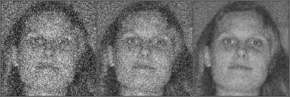

In [ ]:
Image(filename='Img/NoiseReductionCorrelation.png')

<!-- ![title](Img/NoiseReductionCorrelation.png) -->
<!-- <img src="Img/NoiseReductionCorrelation.png" alt="Drawing" width= "500"/>   -->
>> - mean (convolution) filtering: 
<!-- ![title](Img/meanFilter.png) -->
<!--  <img src="Img/meanFilter.png" alt="Drawing" width= "400"/> -->


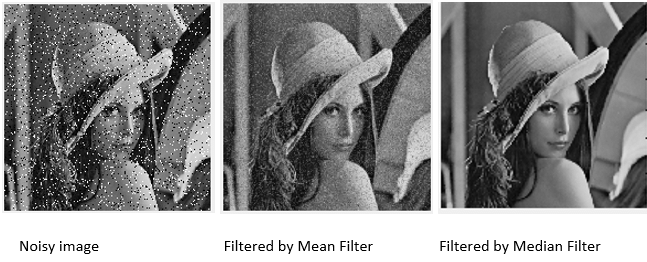

In [ ]:
Image(filename='Img/meanFilter.png')

>> - median filtering:
<!-- ![title](Img/MedianFilter.png) -->
<!--  <img src="Img/MedianFilter.png" alt="Drawing" width= "400"/> -->


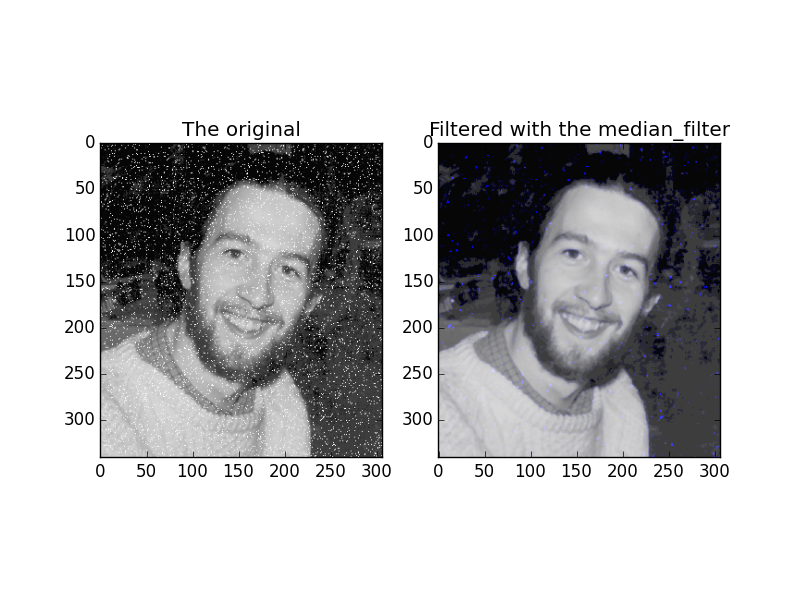

In [ ]:
Image(filename='Img/MedianFilter.png')

>> - Gaussian smoothing:
<!-- ![title](Img/GaussinVSmedian.png) -->
<!--   <img src="Img/GaussinVSmedian.png" alt="Drawing" width= "400"/> -->


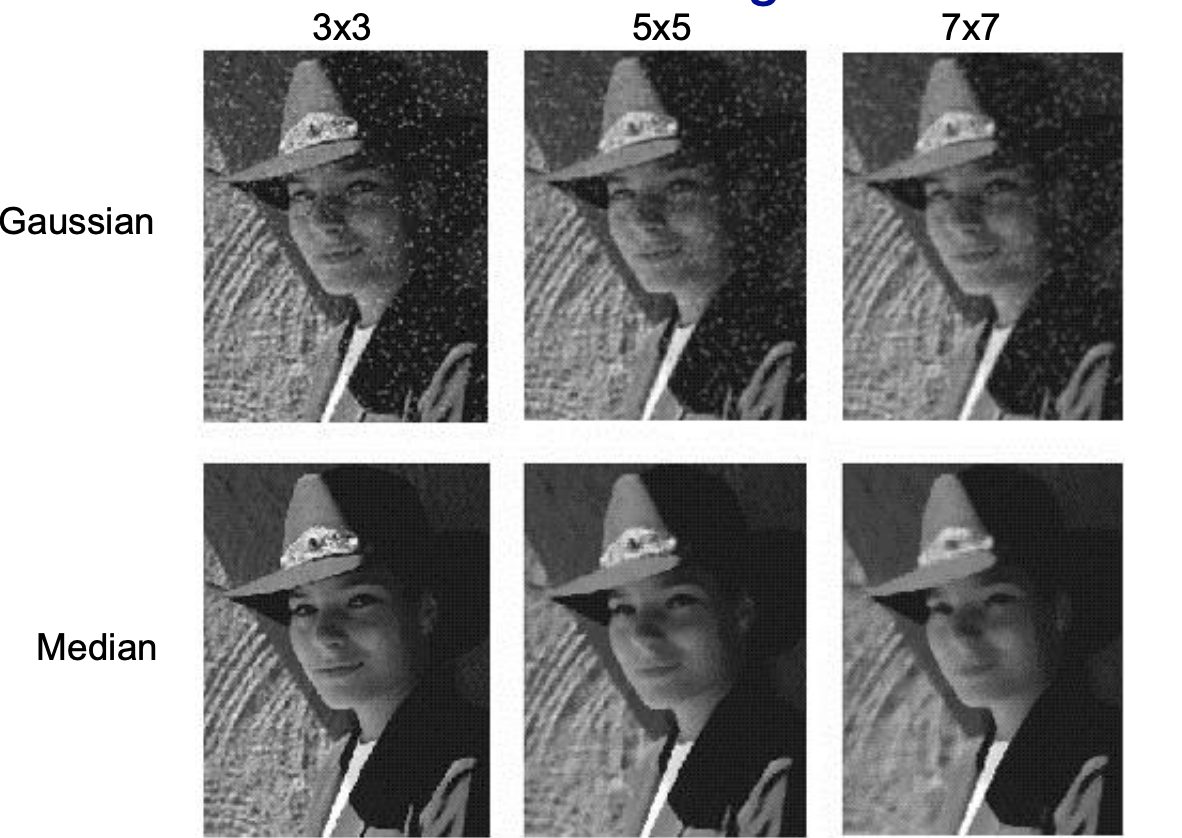

In [ ]:
Image(filename='Img/GaussinVSmedian.png')

* cv2.filter2D: using symmetric padding
* convolve2d: using zeros passing.
Here I'll use filter2D to remove the noise.
- I'll create gaussian filter (here we know the noise function).

In [ ]:
def remove_noise(img: np.ndarray, filter = np.array([[1,1,1],[1,1,1],[1,1,1]])/9)-> np.ndarray:
    clean_img = cv2.filter2D(img,-1,filter)
    return clean_img

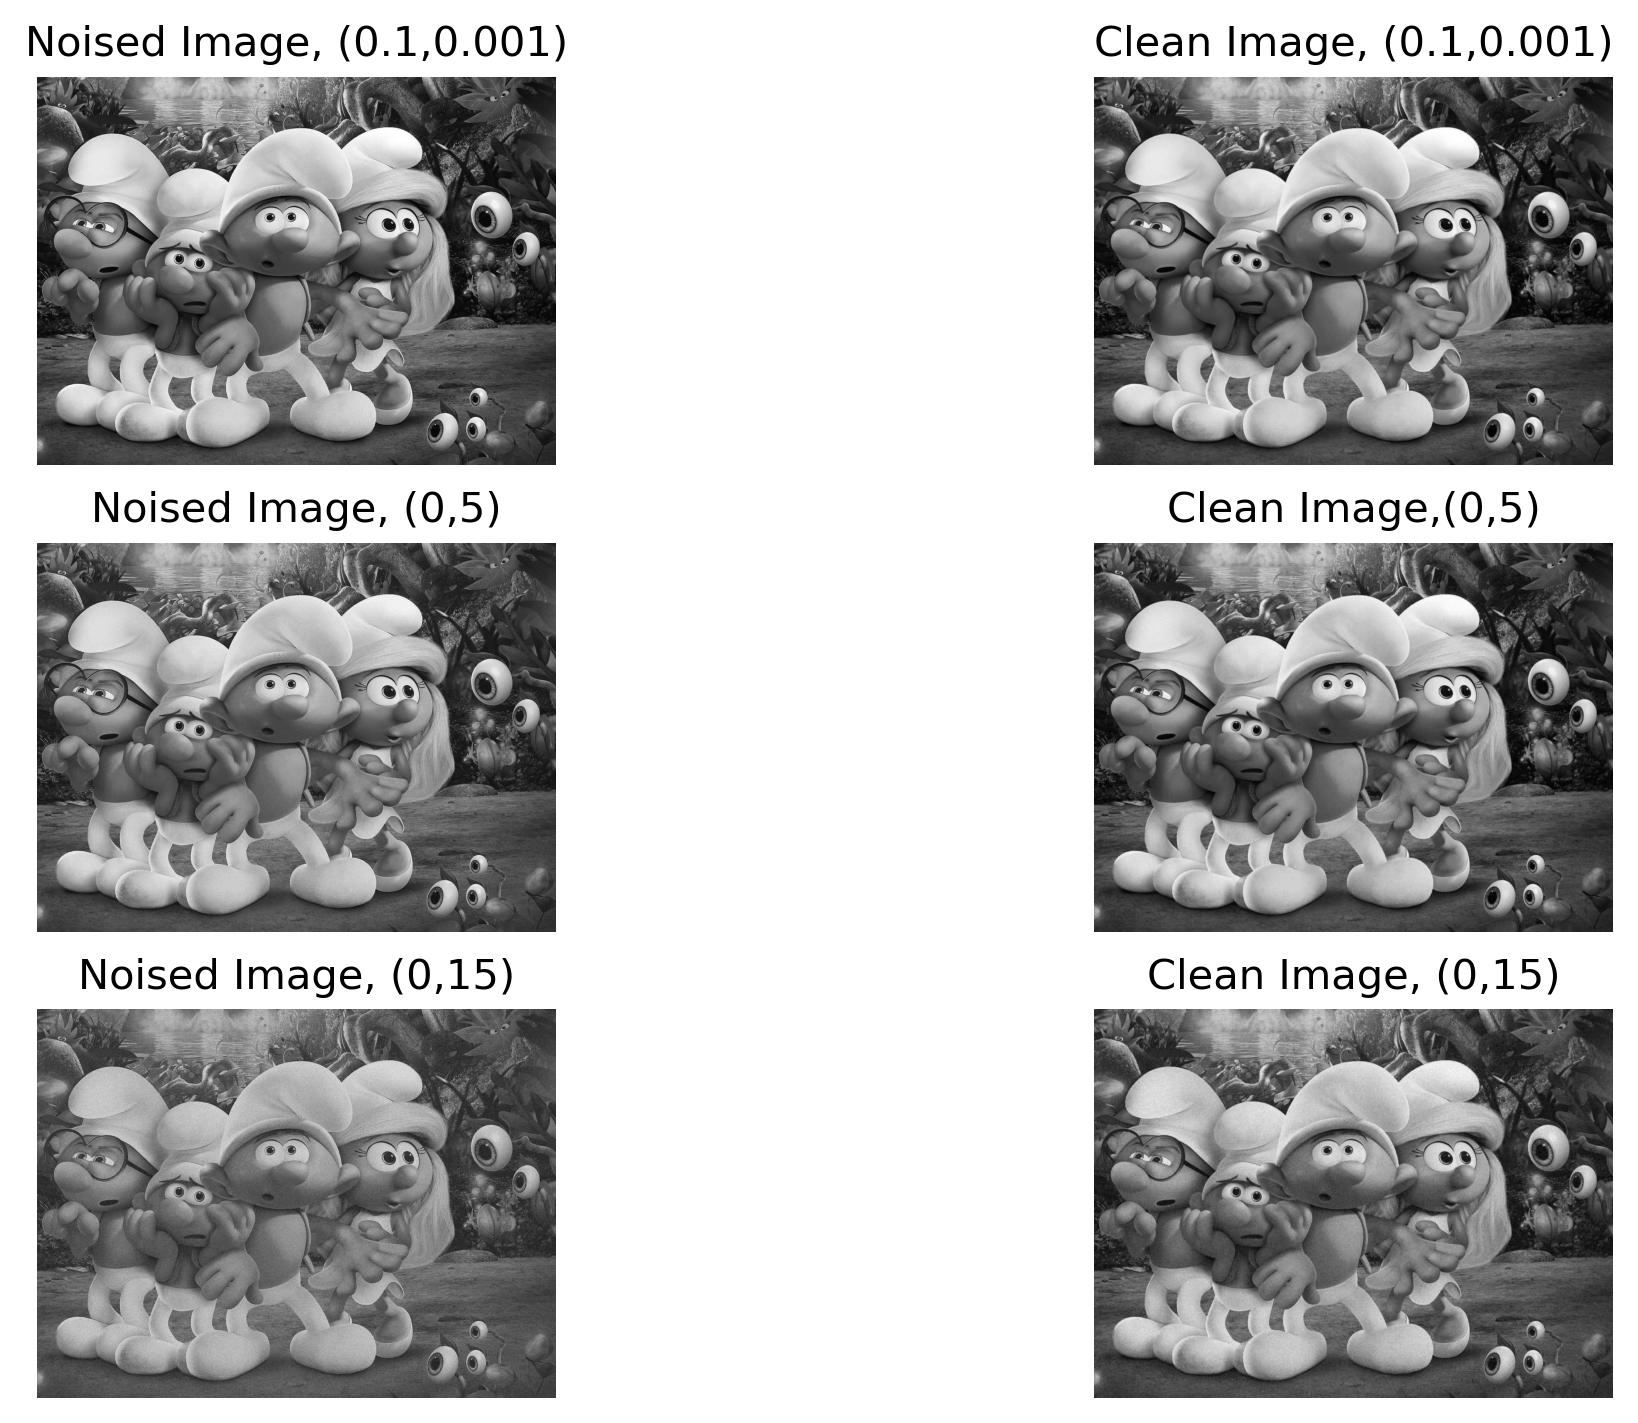

In [ ]:
#filter
size = 5
# divided in (sum(arr))
filter = np.array([[1,2,1],[2,4,2],[1,2,1]])
filter = filter/sum(sum(filter))
# create figure
fig = plt.figure(figsize=(10, 7),dpi= 250)
# setting values to rows and column variables
rows = 3
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
img_show(noised_img_1 ,cmap = 'gray',title = "Noised Image, (0.1,0.001)", axis = 'off')
# Adds a subplot at the 2st position
fig.add_subplot(rows, columns, 2)
clean_img_1 = remove_noise(noised_img_1, filter )
img_show(clean_img_1,cmap = 'gray',title = "Clean Image, (0.1,0.001)", axis = 'off')
# Adds a subplot at the 3st position
fig.add_subplot(rows, columns, 3)
img_show(noised_img_2,cmap = 'gray',title = "Noised Image, (0,5)", axis = 'off')
# Adds a subplot at the 4st position
fig.add_subplot(rows, columns, 4)
clean_img_2 = remove_noise(noised_img_2, filter )
img_show(clean_img_2,cmap = 'gray',title = "Clean Image,(0,5)", axis = 'off')
# Adds a subplot at the 5st position
fig.add_subplot(rows, columns, 5)
img_show(noised_img_3,cmap = 'gray',title = "Noised Image, (0,15)", axis = 'off')
# Adds a subplot at the 6st position
fig.add_subplot(rows, columns, 6)
clean_img_3 = remove_noise(noised_img_3, filter )
img_show(clean_img_3,cmap = 'gray',title = "Clean Image, (0,15)", axis = 'off')


### Histogram difference 
A histogram difference is an effective measure for detecting similarity in images.  
By detecting significant changes in the weighted color histogram of two images, we form a more robust measure for image correspondence.   
$D_h(t) = \Sigma(v) = |H_{t-1}(v) - H_t(v)|$    
$D_h(t) =$ difference value. 

If the histogram is actually three separate sets for RGB, the difference may simply be summed.   
$ D_{H-R}(t)= \sum_{v=0}^{N} \|H_{R_{t-1}}(v)-H_{R_t}(v)|\ $  
$ D_{H-G}(t)= \sum_{v=0}^{N} \|H_{G_{t-1}}(v)-H_{G_t}(v)|\ $   
$ D_{H-B}(t)= \sum_{v=0}^{N} \|H_{B_{t-1}}(v)-H_{B_t}(v)|\ $  
$ D_{H-RGB}(t)= \frac{D_{H-R}(t)+D_{H-G}(t)+D_{H-B}(t)}{3} \ $  
* $ N = $ #bins in the histogram, usually 256.   

#### Histogram & openCV:
` hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8],[0, 256, 0, 256, 0, 256])`  
[More on how to implement](https://pyimagesearch.com/2014/07/14/3-ways-compare-histograms-using-opencv-python/)  
[Histograms - OpenCV documentation](https://docs.opencv.org/3.4/d6/dc7/group__imgproc__hist.html)  
[More on the subject](https://www.sciencedirect.com/topics/engineering/histogram-difference)

In [ ]:
def calc_hist(image, bins = 256):
    # create the histogram 
    histogram, bin_edges = np.histogram(image, bins=bins, range=(0, bins + 1))
    return histogram

def show_hist(hist,bins, title = "No title", xlabel = "grayscale value", ylabel = "pixel count",
              xlim = [0.0,1.0],):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(xlim)
    plt.plot(bins, hist) 

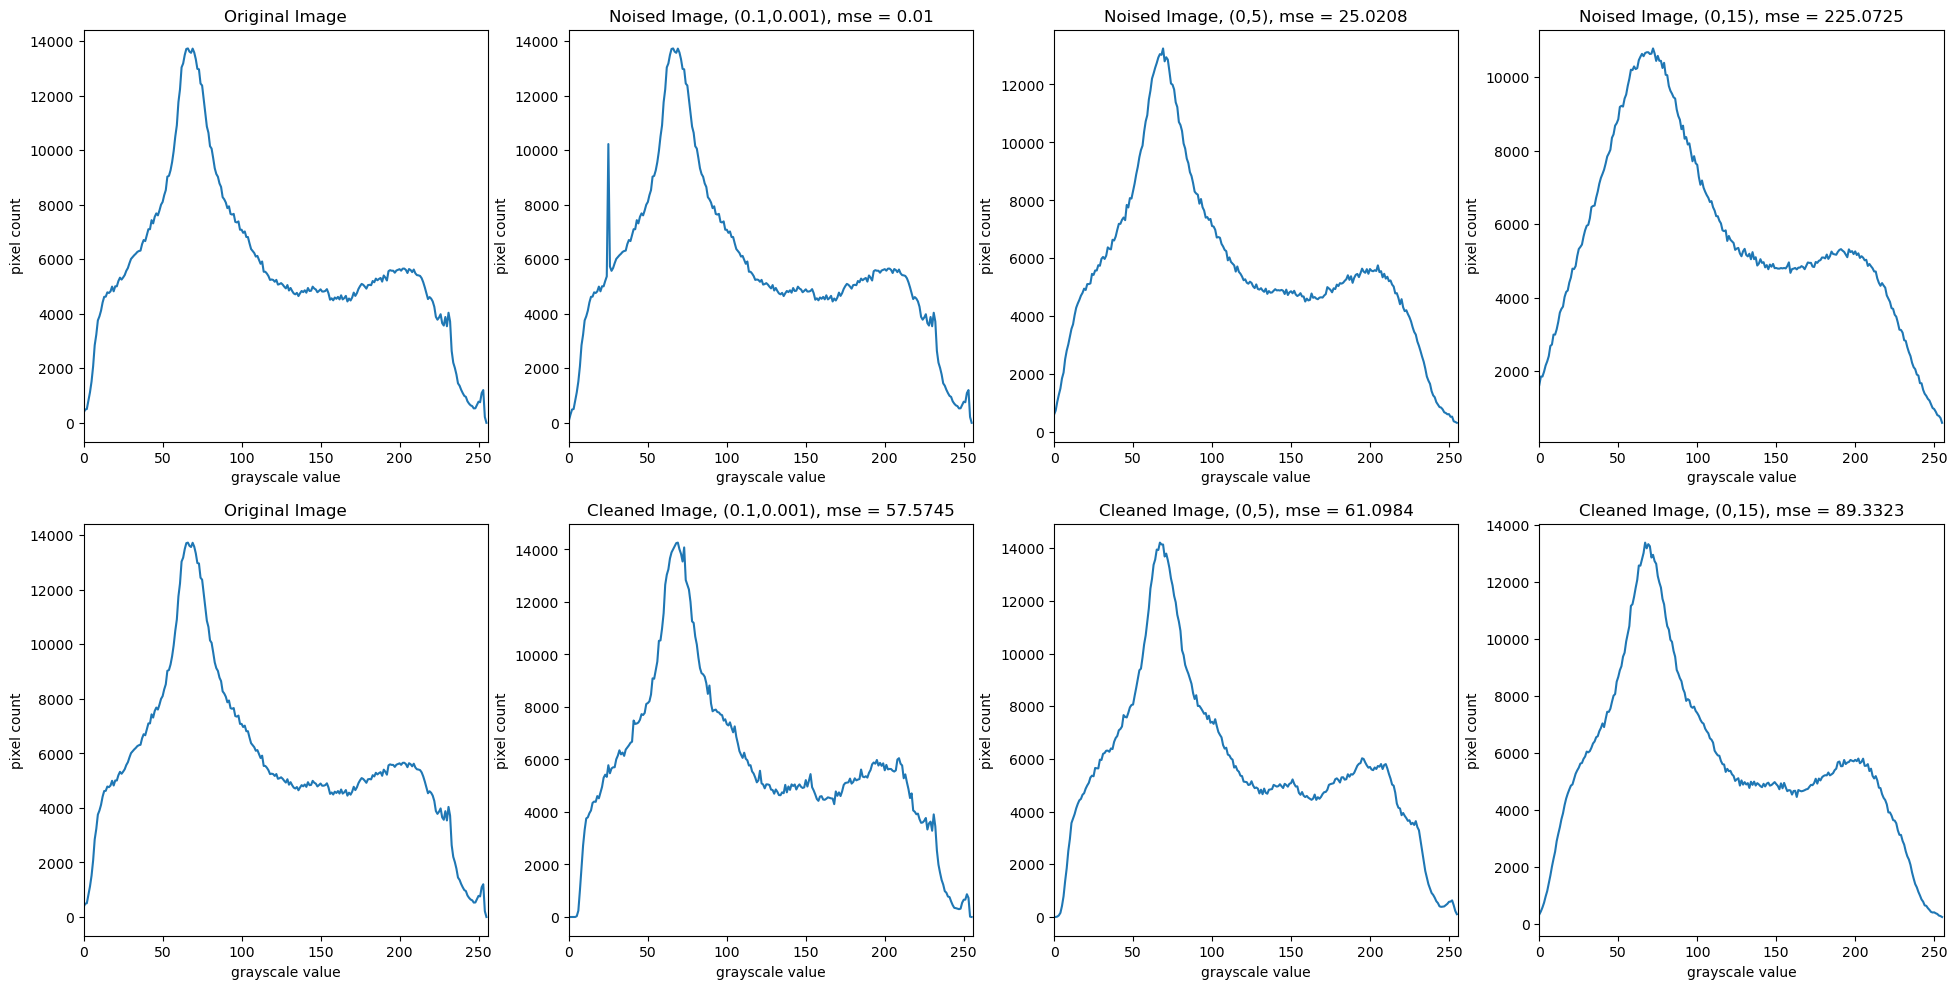

In [ ]:
# create figure
fig = plt.figure(figsize=(24, 12),dpi= 100)
rows = 2
columns = 4
origin_img_hist = calc_hist(original_img)
# create histogram for each noised image
noised_img1_hist = calc_hist(noised_img_1)
noised_img2_hist = calc_hist(noised_img_2)
noised_img3_hist = calc_hist(noised_img_3)
# create histogram for each cleande image
clean_img1_hist = calc_hist(clean_img_1)
clean_img2_hist = calc_hist(clean_img_2)
clean_img3_hist = calc_hist(clean_img_3)

#plot all hidtograms
bins = np.arange(0, 256, 1)
#first row
plt.subplot(rows,columns,1)
show_hist(origin_img_hist,bins, title = "Original Image",xlim = [0,256])
plt.subplot(rows,columns,2)
show_hist(noised_img1_hist,bins, title = "Noised Image, (0.1,0.001), mse = " + str(round(mse(original_img,noised_img_1),4)),xlim = [0,256])
plt.subplot(rows,columns,3)
show_hist(noised_img2_hist,bins, title = "Noised Image, (0,5), mse = " + str(round(mse(original_img,noised_img_2),4)),xlim = [0,256])
plt.subplot(rows,columns,4)
show_hist(noised_img3_hist,bins, title = "Noised Image, (0,15), mse = " + str(round(mse(original_img,noised_img_3),4)),xlim = [0,256])

#second row
plt.subplot(rows,columns,5)
show_hist(origin_img_hist,bins, title = "Original Image",xlim = [0,256])
plt.subplot(rows,columns,6)
show_hist(clean_img1_hist,bins, title = "Cleaned Image, (0.1,0.001), mse = " + str(round(mse(original_img,clean_img_1),4)),xlim = [0,256])
plt.subplot(rows,columns,7)
show_hist(clean_img2_hist,bins, title = "Cleaned Image, (0,5), mse = " + str(round(mse(original_img,clean_img_2),4)),xlim = [0,256])
plt.subplot(rows,columns,8)
show_hist(clean_img3_hist,bins, title = "Cleaned Image, (0,15), mse = " + str(round(mse(original_img,clean_img_3),4)),xlim = [0,256])
#show 
plt.show()

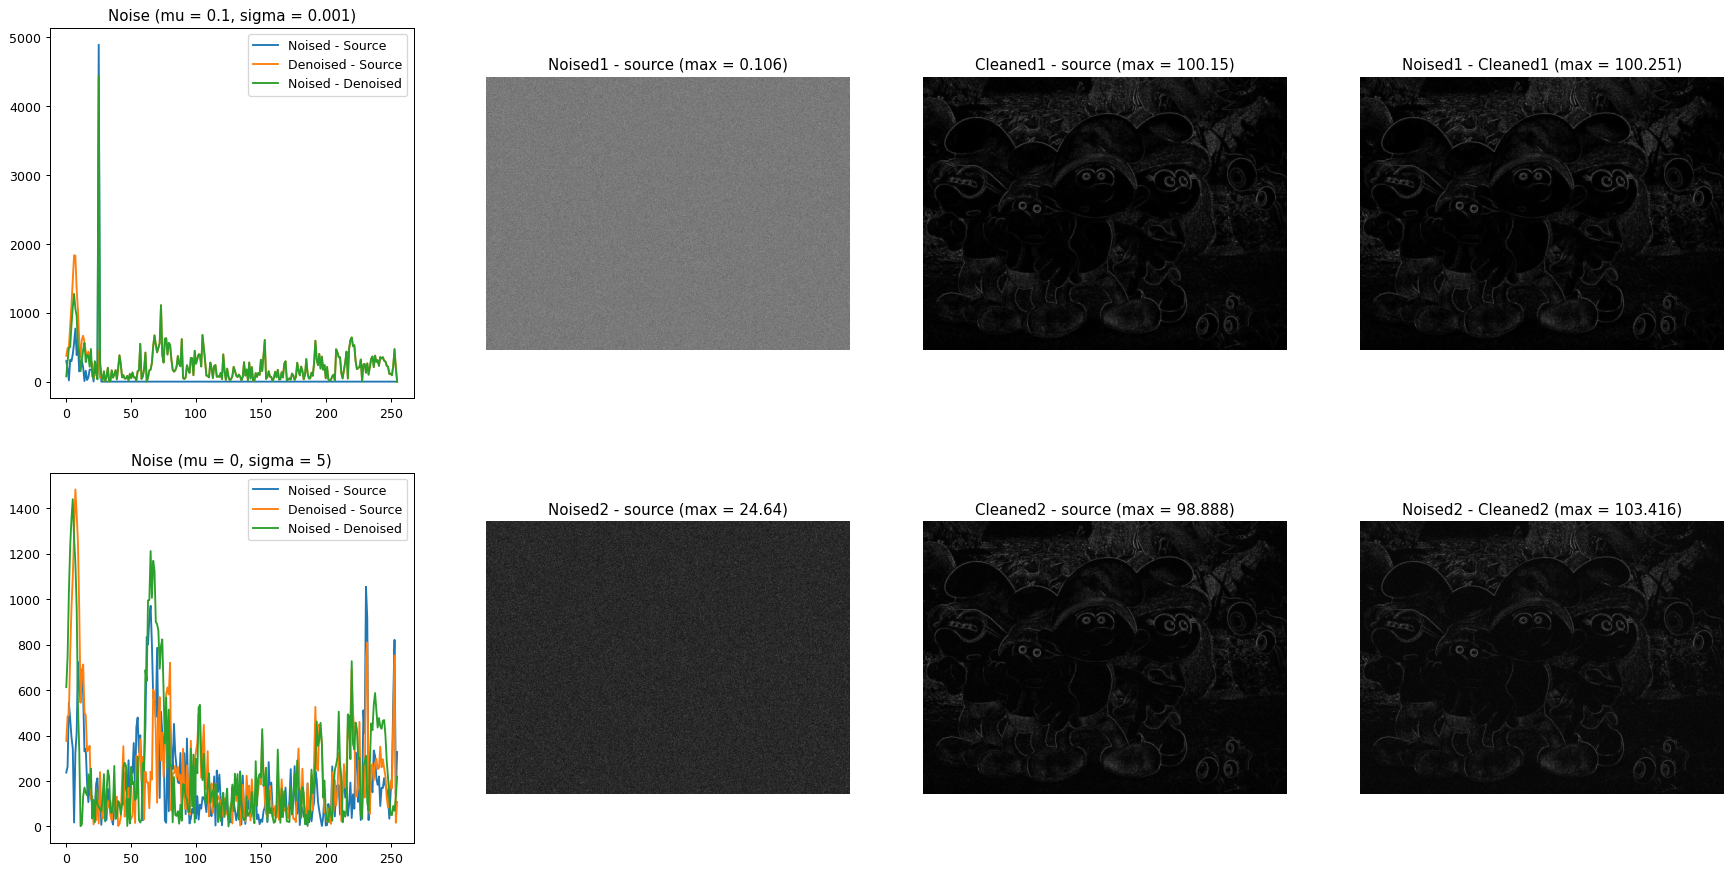

In [ ]:
#differces: source_img - blur_img
fig = plt.figure(figsize=(24, 12),dpi= 90)
rows = 2
columns = 4

#img1_diff_hists
noised_img1_source_diff = np.abs(noised_img1_hist - origin_img_hist)
clean_img1_source_diff = np.abs(clean_img1_hist - origin_img_hist)
noised_clean_img1_diff = np.abs(noised_img1_hist-clean_img1_hist)
#img1 diff
noised_img1_source_diffI = np.abs(noised_img_1 - original_img)
clean_img1_source_diffI = np.abs(clean_img_1 - original_img)
noised_clean_img1_diffI = np.abs(noised_img_1 - clean_img_1)

#ing2 diff hists
noised_img2_source_diff = np.abs(noised_img2_hist - origin_img_hist)
clean_img2_source_diff = np.abs(clean_img2_hist - origin_img_hist)
noised_clean_img2_diff = np.abs(noised_img2_hist-clean_img2_hist)
#img1 diff
noised_img2_source_diffI = np.abs(noised_img_2 - original_img)
clean_img2_source_diffI = np.abs(clean_img_2 - original_img)
noised_clean_img2_diffI = np.abs(noised_img_2 - clean_img_2)

#first row
plt.subplot(rows,columns,1)
#mean = 0.1 ,sigma = 0.001
plt.plot(noised_img1_source_diff, label = "Noised - Source")
plt.plot(clean_img1_source_diff, label = "Denoised - Source")
plt.plot(noised_clean_img1_diff, label = "Noised - Denoised")
plt.title("Noise (mu = 0.1, sigma = 0.001)")
plt.legend()

plt.subplot(rows,columns,2)
img_show(noised_img1_source_diffI,cmap='gray',title='Noised1 - source (max = ' 
         + str(np.round(noised_img1_source_diffI.max(),3)) + ')')
plt.subplot(rows,columns,3)
img_show(clean_img1_source_diffI,cmap='gray',title='Cleaned1 - source (max = ' 
         + str(np.round(clean_img1_source_diffI.max(),3)) + ')')
plt.subplot(rows,columns,4)
img_show(noised_clean_img1_diffI,cmap='gray',title='Noised1 - Cleaned1 (max = ' 
         + str(np.round(noised_clean_img1_diffI.max(),3)) + ')')
#second row
#mean = 0, sigma = 5
plt.subplot(rows,columns,5)
plt.plot(np.abs(noised_img2_hist - origin_img_hist), label = "Noised - Source")
plt.plot(np.abs(clean_img2_hist - origin_img_hist), label = "Denoised - Source")
plt.plot(np.abs(noised_img2_hist-clean_img2_hist), label = "Noised - Denoised")
plt.title("Noise (mu = 0, sigma = 5)")
plt.legend()

plt.subplot(rows,columns,6)
img_show(noised_img2_source_diffI,cmap='gray',title='Noised2 - source (max = ' 
         + str(np.round(noised_img2_source_diffI.max(),3)) + ')')
plt.subplot(rows,columns,7)
img_show(clean_img2_source_diffI,cmap='gray',title='Cleaned2 - source (max = ' 
         + str(np.round(clean_img2_source_diffI.max(),3)) + ')')
plt.subplot(rows,columns,8)
img_show(noised_clean_img2_diffI,cmap='gray',title='Noised2 - Cleaned2 (max = ' 
         + str(np.round(noised_clean_img2_diffI.max(),3)) + ')')
plt.show()

#### Explain obtained scores:
1. Gaussian noise (mean = 0.1, sigma = 0.001):  
    - **mse (original image, noised image) = 0.01:**  
        - This result indicates a closeness between the values of the images, which means that there is no great difference between the original and the noisy image. Hence the differences we see are minor.  
    - **max diff(original image , noised image) = 0.105:**
        - This result also indicates a similarity between the images because the maximum difference between them is actually small.  
    - **mse (original image, cleaned image) = 32.076:**
        - Comparing the "clean" image to the original brings a relatively large difference from comparing the noisy image to the original hence the noise filtering did not work well in this case, but because the difference is still small, to the human eye the images will look identical.  
2. Gaussian noise (mean = 0, sigma = 5):  
    - **mse (original image, noised image) = 24.9977**    
    - **mse (original image, cleaned image) = 32.076**  
3. Gaussian noise (mean = 0, sigma = 15):
    - **mse (original image, noised image) > mse (original image, cleaned image)**: \
        so in this case we can see that the filtering has worked.
    

### Rotate an Image
>How does OpenCV rotate images?
>> rotation by an angle $\theta$ can be defined by constructing a matrix, M, in the form:\
M = \begin{bmatrix}\cos \theta & -\sin \theta \\ \sin \theta & \cos\theta\end{bmatrix}
[Rotation & openCV](https://pyimagesearch.com/2021/01/20/opencv-rotate-image/)

But, here I'll implement rotation without openCV.
1. I will use the following equation:\
\begin{gather}
\begin{bmatrix}X'\\Y'\end{bmatrix} = 
\begin{bmatrix}\cos \theta & -\sin \theta \\ \sin \theta & \cos\theta\end{bmatrix}\begin{bmatrix}X\\Y\end{bmatrix}
\end{gather}
2. Radians or Degree?: 
    - Use Radians:
        - when you are looking at objects moving in circular paths or parts of circular path.  In particular, rotational motion equations are almost always expressed using radians.  The initial parameters of a problem might be in degrees, but you should convert these angles to radians before using them.\
    - Use Degrees:
        - when you are measuring angles using a protractor, or describing a physical picture.  Most people have developed intuitive feel for the common angles.  This would be common in vector related problems, including speeds, projectiles, forces, and similar situations

So I'll conver degree to radian by using: 1°=π180\
    $Radian = \theta * \frac{\pi}{180}$  
[Radians vs. Degrees](https://www.physicsthisweek.com/math/radians-vs-degrees/)

3. Note:
    - If it is a color image I'll rotate for each of the channels. That is, I'll run the function on each channel individually and unify the results.
4. Dimension of rotated image:
    - When an image is rotated, the new locations of some pixels may be outside the image if the input and output image sizes are the same. For this reason, we need to check the bounds of the calculated output coordinates.
5. The coordinates of a point ($x_1, y_1)$ when rotated by an angle $θ$ around $(x_0, y_0)$ become $(x_2, y_2)$, as shown by the following equation:\
$ x_2=cos(θ)*(x_1−x_0)+sin(θ)*(y_1−y_0)\\
y_2=−sin(θ)*(x_1−x_0)+cos(θ)*(y_1−y_0)$
6. I will make the rotation around the center of the image

[Extra reading](https://www.sciencedirect.com/topics/computer-science/image-rotation)

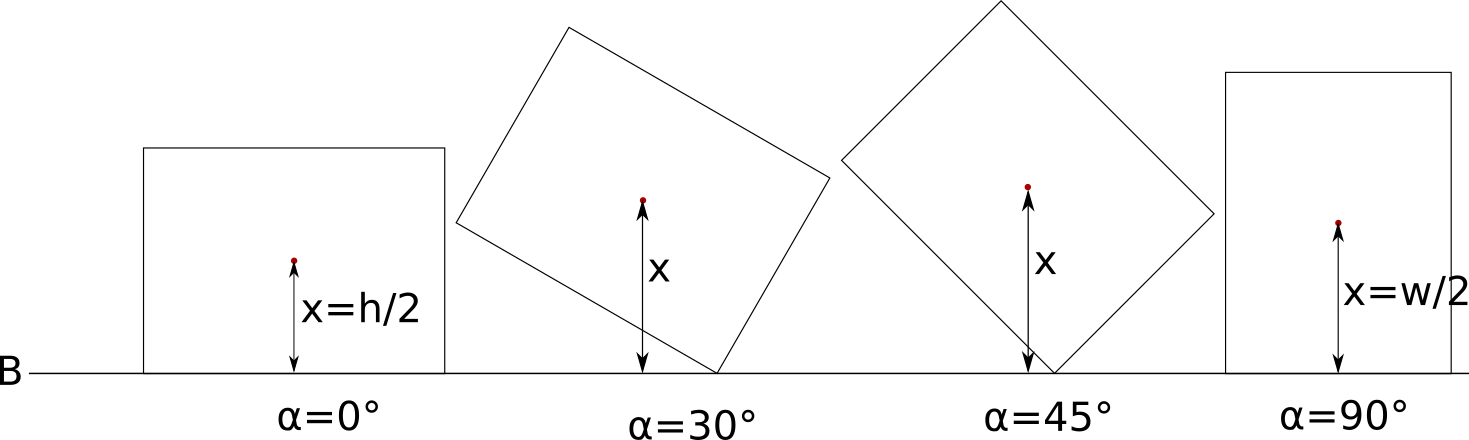

In [ ]:
Image(filename='Img/RotatesDeg.png')

<!-- <img src="Img/RotatesDeg.png" alt="Drawing" width= "500"/> -->
    - Worse case is for 45 degree- heigh and width of rotated image ar bigger then original image.
<!-- <img src="Img/calculateDim.png" alt="Drawing" width= "500"/> -->

$Rotated image Dim = \sqrt{x^2 + y^2} = \sqrt{width^2 + height^2}$

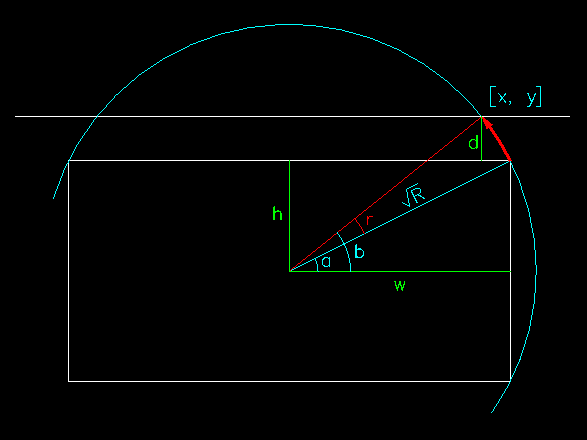

In [ ]:
Image(filename='Img/calculateDim.png')

In [ ]:
def rotate_image(img: np.ndarray, angle: float) -> np.ndarray:
    #convert angle to radian
    radian = angle * np.pi /180.0
    #claculate sin(angle), cos(angle)
    cosine=math.cos(angle)
    sine=math.sin(angle)
    
    # height = rows, width = cols
    height,width = img.shape
    
    # define rotate image filled with zeros, shape as original
    rotated_img = np.zeros((height,width))
    
    # Find the centre of original image 
    center_height = round(((height+1)/2)-1)    
    center_width = round(((width+1)/2)-1)  
        
    for i in range(height):
        for j in range(width):
            #co-ordinates of pixel with respect to the centre of original image
            y = height - 1 - i - center_height                   
            x = width - 1 - j - center_width                      

            #co-ordinate of pixel with respect to the rotated image
            new_y = round(-x*sine + y*cosine)
            new_x = round(x*cosine + y*sine)
            #change new_x and new_y with respect to the new centre
            new_y = center_height - new_y
            new_x = center_width - new_x

            # adding if check to prevent any errors in the processing
            if (new_x < width) and (new_y < height) and (new_x >= 0) and (new_y >= 0):
                rotated_img[new_y,new_x]=img[i,j]

  
    return rotated_img.astype(np.uint8)


Original shape =(1050, 1400)
Rotated shape = (1050, 1400)


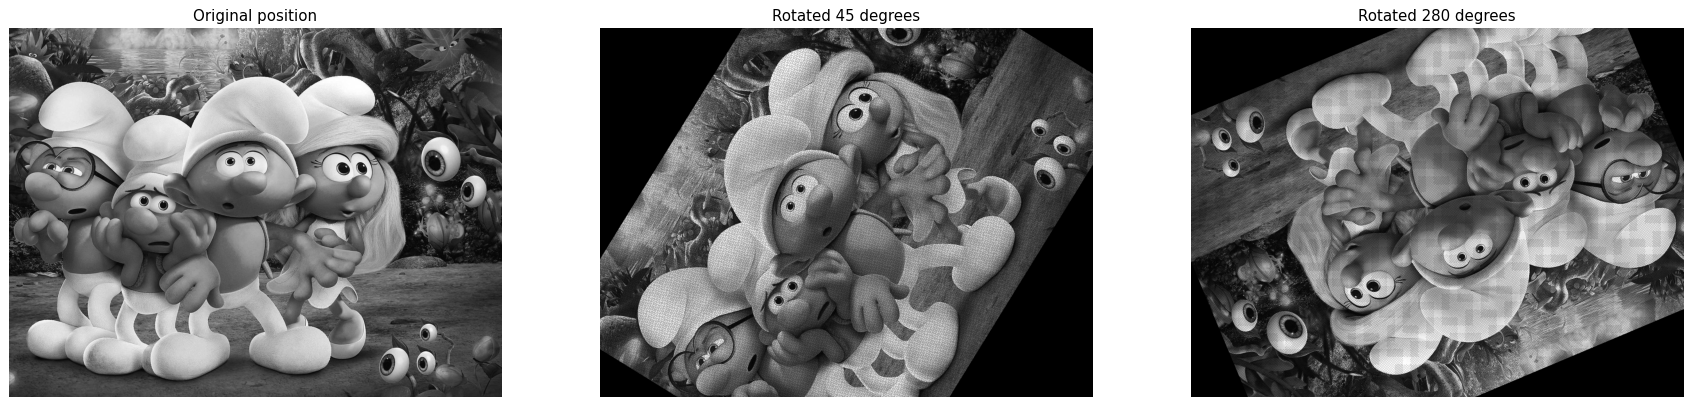

In [ ]:
print(f'Original shape ={original_img.shape}\nRotated shape = {rotated_img.shape}')
fig = plt.figure(figsize=(24, 12),dpi= 90)
rows = 1
columns = 3
plt.subplot(rows,columns,1)
img_show(original_img,cmap='gray',title='Original position')
 
#rotated 45 degree
rotated45_img = rotate_image(original_img,45)
plt.subplot(rows,columns,2)
img_show(rotated45_img,cmap='gray',title='Rotated 45 degrees')
 
#rotated 280 degree
rotated280_img = rotate_image(original_img,280)
plt.subplot(rows,columns,3)
img_show(rotated280_img,cmap='gray',title='Rotated 280 degrees')

#### Rotation with changing size of image (the whole image can be seen):
1. define new shape:\
`new_height  = round(abs(height*cosine)+abs(width*sine))+1`  
`new_width  = round(abs(width*cosine)+abs(height*sine))+1`  
3. claculate new center:\
`new_center_height= round(((new_height+1)/2)-1)  `         
`new_center_width= round(((new_width+1)/2)-1) `     
4.since image will be rotated the centre will change too, so to adjust to that we will need to change new_x and new_y with respect to the new center- (inside the loop):\
`new_y=original_center_height-new_y`  
`new_x=original_center_width-new_x`  

#### openCV solution:
`y,x = image.shape`  
`rot_mat = cv2.getRotationMatrix2D((x // 2, y // 2), angle, 1.0)`  
`result = cv2.warpAffine(image, rot_mat, image.shape, flags=cv2.INTER_LINEAR)`  


# Albumentations: 
### summary:
- flexible image augmantaion library, that supports more than 60 different image augmentations. For example: Adjusting brightness,Rotation, mirroring, crop image, etc.
Also, those libraries allow you to set the required probabilities and the magnitude of values for each transformation, this feature can be very helpfull when we decide use on augmantation pipeline. You pass an image to the pipeline, the image goes through all transformations, and then you receive an augmented image from the pipeline. Very helpfull on classification.
There is more feature that didn't mentioned here. Needless to say, all this goodness is done in a few lines of code.

[Full documantaion](https://albumentations.ai/docs/)  
- install on conda:  
`conda install -c conda-forge imgaug`  
`conda install -c conda-forge albumentations`

In [ ]:
print("""           
        _...----.._
     ,:':::::.     `>.
   ,' |:::::;'     |:::.
  /    `'::'       :::::\\
 /         _____     `::;\\
:         /:::::\\      `  :
| ,.     /::Bye::\\        |
|;:::.   `::::::;'        |
::::::     `::;'      ,.  ;
 \:::'              ,::::/
  \                 \\:::/
   `.     ,:.        :;'
     `-.::::::..  _.''
        ```----'''

""")

           
        _...----.._
     ,:':::::.     `>.
   ,' |:::::;'     |:::.
  /    `'::'       :::::\
 /         _____     `::;\
:         /:::::\      `  :
| ,.     /::Bye::\        |
|;:::.   `::::::;'        |
::::::     `::;'      ,.  ;
 \:::'              ,::::/
  \                 \:::/
   `.     ,:.        :;'
     `-.::::::..  _.''
        ```----'''


